### Import libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes as ds
import geopandas as gdp

### Load the data

In [7]:
cities = gdp.read_file ('/Users/nicolasdemuynck/BeCode/Github/finalchallenge/Introduction to GIS Analysis with GeoPandas using Python/Shapefiles/belgian_cities.shp')

### Plotting the cities shapefile

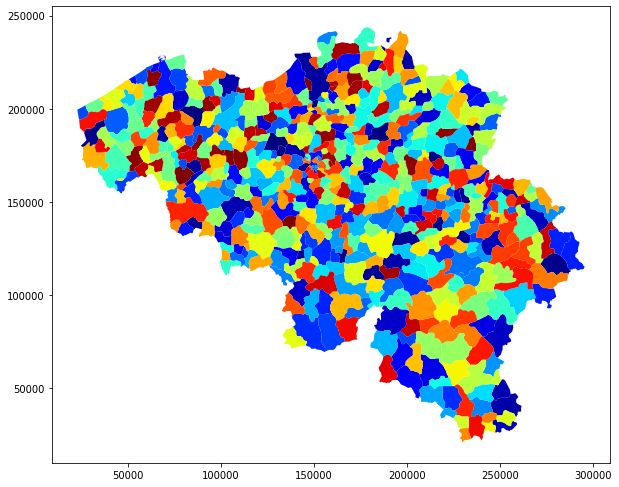

In [8]:
cities.plot (cmap = 'jet', column = 'NAME_4', figsize = (10,10))
plt.show ()

### Importing and plotting AOI shapefile

<AxesSubplot:>

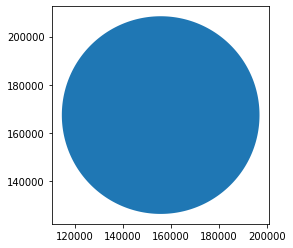

In [9]:
AOI = gdp.read_file ('/Users/nicolasdemuynck/BeCode/Github/finalchallenge/Introduction to GIS Analysis with GeoPandas using Python/Shapefiles/area_of_interest_.shp')
AOI.plot ()

### Dsiplay both shapefiles together

<AxesSubplot:>

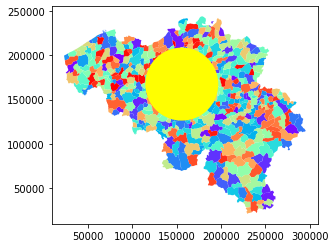

In [10]:
fix, ax = plt.subplots (1)
cities.plot (ax=ax, cmap = 'rainbow', column = 'NAME_4') #'NAME_4': cities
AOI.plot (ax=ax, facecolor = 'yellow')

### Intersecting

<AxesSubplot:>

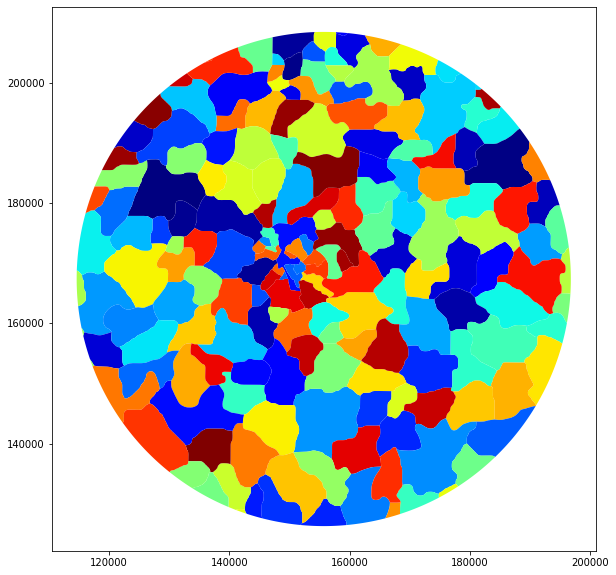

In [13]:
cities_in_AOI = gdp.overlay(cities, AOI, how = 'intersection')
cities_in_AOI.plot (figsize = (10,10), cmap = 'jet', column = 'NAME_4')

In [14]:
cities_in_AOI

,NAME_4,Id,geometry
0,Anderlecht,0,"POLYGON ((143793.126 166452.379, 143610.878 16..."
1,Brussel,0,"POLYGON ((147766.293 170637.180, 147826.869 17..."
2,Elsene,0,"MULTIPOLYGON (((151867.674 167090.660, 151805...."
3,Etterbeek,0,"POLYGON ((152732.322 169655.021, 152703.407 16..."
4,Evere,0,"POLYGON ((153968.453 172252.061, 153885.348 17..."
...,...,...,...
181,Jemeppe-sur-Sambre,0,"POLYGON ((168377.727 128291.878, 168387.327 12..."
182,La Bruyère,0,"POLYGON ((178038.074 132890.380, 177986.856 13..."
183,Namur,0,"POLYGON ((174844.759 131020.333, 174838.102 13..."
184,Sambreville,0,"POLYGON ((165946.567 127585.068, 166304.590 12..."


In [15]:
cities.crs #coordinate reference system 

<Projected CRS: PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["B ...>
Name: Belge 1972 / Belgian Lambert 72
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [16]:
cities_in_AOI.area #in terms of square metres (you can see this in CRS : Lambert system)

0      1.783468e+07
1      3.221806e+07
2      6.039562e+06
3      2.962803e+06
4      5.037014e+06
           ...     
181    1.751827e+07
182    2.408626e+07
183    2.395717e+06
184    4.317153e+06
185    3.290583e+07
Length: 186, dtype: float64

### Assigning a new column - Area

In [17]:
cities_in_AOI['Area(km2)'] = cities_in_AOI.area/1000000

In [18]:
cities_in_AOI

,NAME_4,Id,geometry,Area(km2)
0,Anderlecht,0,"POLYGON ((143793.126 166452.379, 143610.878 16...",17.834684
1,Brussel,0,"POLYGON ((147766.293 170637.180, 147826.869 17...",32.218059
2,Elsene,0,"MULTIPOLYGON (((151867.674 167090.660, 151805....",6.039562
3,Etterbeek,0,"POLYGON ((152732.322 169655.021, 152703.407 16...",2.962803
4,Evere,0,"POLYGON ((153968.453 172252.061, 153885.348 17...",5.037014
...,...,...,...,...
181,Jemeppe-sur-Sambre,0,"POLYGON ((168377.727 128291.878, 168387.327 12...",17.518270
182,La Bruyère,0,"POLYGON ((178038.074 132890.380, 177986.856 13...",24.086256
183,Namur,0,"POLYGON ((174844.759 131020.333, 174838.102 13...",2.395717
184,Sambreville,0,"POLYGON ((165946.567 127585.068, 166304.590 12...",4.317153
